In [370]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [190]:
df = pd.read_csv('oregon_washington_combined_data.csv')
df_pca = df.copy() # a copy for pca usage

### EDA using PCA

In [192]:
# check for NaNs because PCA cannot be done with them
df_pca.isna().sum()[df_pca.isna().sum() > 0]

Next_Year_Total_Revenue            1359
Pct_Inc_Total_Revenue_Next_Year    1453
dtype: int64

In [194]:
# drop the columns that contain NaNs
df_pca.drop(['Next_Year_Total_Revenue', 'Pct_Inc_Total_Revenue_Next_Year'], axis=1, inplace=True)

In [196]:
# drop hospital license column and hospital name since these categorical columns aren't necessary for PCA
df_pca.drop(['Hospital_License_or_AHA', 'Hospital_Name'], axis=1, inplace=True)

In [198]:
# lazy one-hot encode state column
# want to keep it to determine if State is highly present in determining the variance
df_pca = pd.get_dummies(df_pca, columns=['State'], drop_first=True, dtype=int)

In [200]:
df_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Columns: 134 entries, Year to State_Washington
dtypes: int32(1), int64(133)
memory usage: 7.2 MB


In [202]:
# No more object types in the df, therefore scale the data for preparation
df_pca_scaled = StandardScaler().fit_transform(df_pca)
df_pca = pd.DataFrame(df_pca_scaled, columns=df_pca.columns, index=df_pca.index)

In [204]:
df_pca.columns.tolist()

['Year',
 'Quarter',
 'Licensed_Beds',
 'Acute_Care_Medicare_Discharges',
 'Acute_Care_Medicaid_Discharges',
 'Acute_Care_Self_Pay_Discharges',
 'Acute_Care_Other_Discharges',
 'Acute_Care_Total_Discharges',
 'Swing_Bed_Medicare_Discharges',
 'Swing_Bed_Medicaid_Discharges',
 'Swing_Bed_Self_Pay_Discharges',
 'Swing_Bed_Other_Discharges',
 'Swing_Bed_Total_Discharges',
 'SNF_Medicare_Discharges',
 'SNF_Medicaid_Discharges',
 'SNF_Self_Pay_Discharges',
 'SNF_Other_Discharges',
 'SNF_Total_Discharges',
 'Psych_Rehab_CDU_Medicare_Discharges',
 'Psych_Rehab_CDU_Medicaid_Discharges',
 'Psych_Rehab_CDU_Self_Pay_Discharges',
 'Psych_Rehab_CDU_Other_Discharges',
 'Psych_Rehab_CDU_Total_Discharges',
 'Total_Medicare_Discharges',
 'Total_Medicaid_Discharges',
 'Total_Self_Pay_Discharges',
 'Total_Other_Discharges',
 'Total_Discharges',
 'Acute_Care_Medicare_Patient_Days',
 'Acute_Care_Medicaid_Patient_Days',
 'Acute_Care_Self_Pay_Patient_Days',
 'Acute_Care_Other_Patient_Days',
 'Acute_Care_Tota

In [206]:
df_pca.head(3)

,Year,Quarter,Licensed_Beds,Acute_Care_Medicare_Discharges,Acute_Care_Medicaid_Discharges,Acute_Care_Self_Pay_Discharges,Acute_Care_Other_Discharges,Acute_Care_Total_Discharges,Swing_Bed_Medicare_Discharges,Swing_Bed_Medicaid_Discharges,...,Operating_Margin,Net_Non_Operating_Gains_Losses,Tax_Subsidies,Gross_Total_Margin,Gross_Accounts_Receivable_Medicare,Gross_Accounts_Receivable_Medicaid,Gross_Accounts_Receivable_Self_Pay,Gross_Accounts_Receivable_Other,Total_Gross_Accounts_Receivable,State_Washington
0,-2.162305,-1.332170,-0.550109,-0.478862,-0.375990,-0.038739,-0.196302,-0.407166,-0.464263,-0.201173,...,-0.031049,-0.126441,-0.211461,-0.106224,-0.393869,-0.340912,-0.115116,-0.269388,-0.396962,-0.816497
1,-2.162305,-0.439531,-0.550109,-0.478862,-0.409152,0.204484,-0.235630,-0.419409,-0.464263,-0.201173,...,0.024374,-0.125453,-0.211461,-0.063671,-0.368426,-0.343127,-0.097953,-0.261766,-0.385453,-0.816497
2,-2.162305,0.453109,-0.550109,-0.514401,-0.364146,0.055848,-0.158487,-0.401601,-0.464263,-0.201173,...,-0.024696,-0.122526,-0.211461,-0.099097,-0.364099,-0.354817,-0.056429,-0.237872,-0.373832,-0.816497


In [208]:
# fit pca with the maximum number of components (== df.shape[1])
pca = PCA(n_components=134)
X_pca = pca.fit_transform(df_pca)

explained_var = pca.explained_variance_ratio_
cum_explained_var = np.cumsum(explained_var)

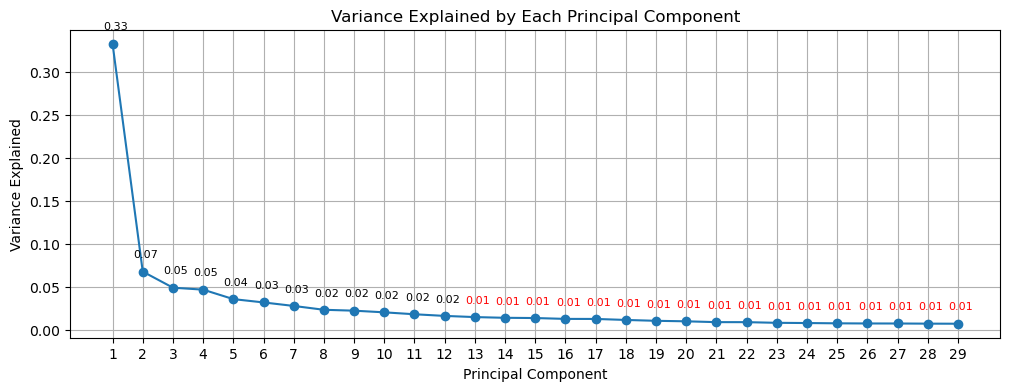

In [210]:
# plot the variance explained by each principal component
plt.figure(figsize=(12,4))
plt.plot(range(1, 30), explained_var[:29], 'o-')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Variance Explained by Each Principal Component')
plt.xticks(range(1, 30))
plt.grid()

# annotate each point
for i, v in enumerate(explained_var[:29]):
    color = 'red' if round(v, 2) == 0.01 else 'black'
    plt.annotate(f'{v:.2f}', 
                 (i+1, v), 
                 textcoords="offset points", 
                 xytext=(2,10),
                 ha='center', fontsize=8, color=color)
plt.show()

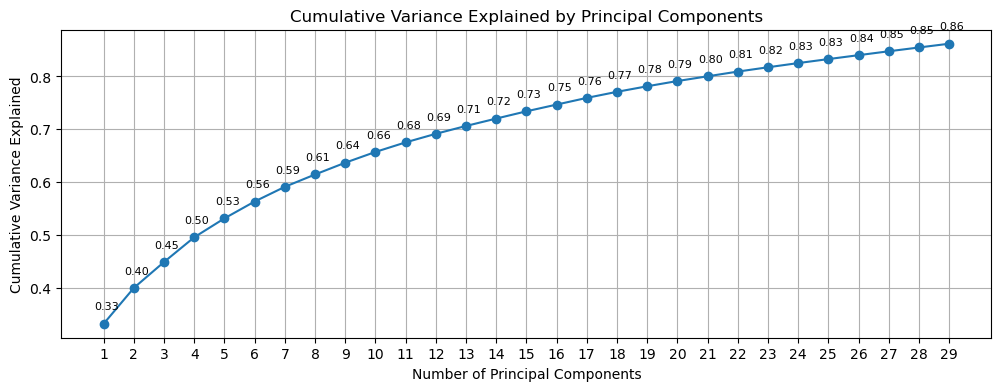

In [149]:
# plot the cumulative proportional variance 
plt.figure(figsize=(12,4))
plt.plot(range(1, 30), cum_explained_var[:29], 'o-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Variance Explained by Principal Components')
plt.xticks(range(1, 30))
plt.grid(True)

# Red barred vertical line between 11 and 12
#plt.axvline(x=12.5, color='red', linestyle='--', linewidth=2)

# Annotate each point
for i, v in enumerate(cum_explained_var[:29]):
    plt.annotate(f'{v:.2f}', 
                 (i+1, v), 
                 textcoords="offset points", 
                 xytext=(2,10),
                 ha='center', fontsize=8)

plt.show()

In [212]:
pca.components_.shape

(134, 134)

In [214]:
# check the weights of each of the features to see what they contribute to with the first PC
loadings = pd.DataFrame(pca.components_.T,
                        columns=[f'PC{i+1}' for i in range(pca.n_components_)],
                        index=df_pca.columns)

pd.set_option('display.max_rows', None)
print(loadings['PC1'].sort_values())
pd.reset_option('display.max_rows')

Swing_Bed_Medicare_Discharges           -0.051091
Swing_Bed_Total_Discharges              -0.050077
Swing_Bed_Medicare_Patient_Days         -0.040716
Swing_Bed_Total_Patient_Days            -0.040139
Swing_Bed_Medicaid_Revenue              -0.024473
Swing_Bed_Total_Revenue                 -0.024045
Swing_Bed_Medicare_Revenue              -0.023259
Swing_Bed_Medicaid_Patient_Days         -0.022041
Swing_Bed_Other_Patient_Days            -0.020862
Swing_Bed_Other_Revenue                 -0.020312
SNF_Self_Pay_Revenue                    -0.019725
SNF_Self_Pay_Patient_Days               -0.018583
Swing_Bed_Medicaid_Discharges           -0.018402
Swing_Bed_Other_Discharges              -0.016646
SNF_Total_Patient_Days                  -0.015045
Swing_Bed_Self_Pay_Discharges           -0.012866
SNF_Medicaid_Patient_Days               -0.012776
SNF_Self_Pay_Discharges                 -0.012364
Swing_Bed_Self_Pay_Patient_Days         -0.011724
Swing_Bed_Self_Pay_Revenue              -0.009473


It seems that the first principal component has to do with general hospital activity (more people being served and more employees). This is exemplified by the most prominent loadings. For instance, the features, such as Licensed Beds, Total Patient Days, and Total Discharges, Total Paid Hours, linked to a high PC1 score deal primarily with the amount of activity in a hospital, and therefore dealing with a lot of people. There is a lot of traffic. And on the opposite end, the features that are negatively associated with the first principal component largely deal with more long term kinds of care (swing beds are transitional care units that help those not suffering acutely anymore become rehabilitated). This means that less people are being served, and therefore less activity. Ultimately, it is overall foot traffic of a hospital. How many people are being helped? How many people are working? 

### Visualize the first two components by the most dominant feature of the first principal component--total days spent in by patients

In [297]:
# set up bins for total patient days
patient_bins = [0, 15000, 30000, 45000, 60000]

# assign the amount of patients to a group (labeled 1-4)
df['Patient_Days_Group'] = pd.cut(df['Total_Patient_Days'], bins=patient_bins, labels=[1, 2, 3, 4], include_lowest=True)

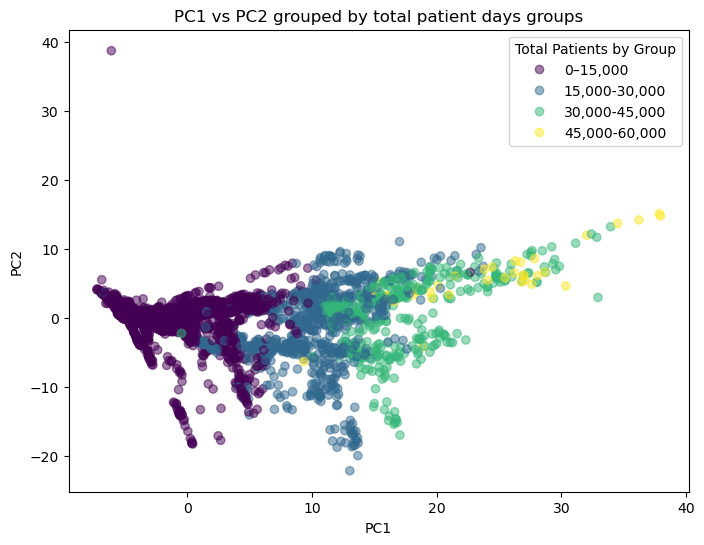

In [299]:
# plot PC1 vs PC2, colored by the year bins
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=df['Patient_Days_Group'].astype(int), cmap='viridis', alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PC1 vs PC2 grouped by total patient days groups')

# put legend for the groups
handles, labels = scatter.legend_elements(prop="colors")
patient_ranges = ["0–15,000", "15,000-30,000", "30,000-45,000", "45,000-60,000"]
plt.legend(handles, patient_ranges, title="Total Patients by Group", loc='best')

plt.show()

The more patients a hospital deals with, the higher it is on the first principal component. This supports the fact that the more foot traffic a hospital has, the more likely it is to have higher overall activity, which is intuitively sound.

### Look over the second principal component

In [250]:
pd.set_option('display.max_rows', None)
print(loadings['PC2'].sort_values())
pd.reset_option('display.max_rows')

Psych_Rehab_CDU_Total_Discharges        -0.242669
Psych_Rehab_CDU_Other_Discharges        -0.226795
Psych_Rehab_CDU_Other_Patient_Days      -0.221710
Psych_Rehab_CDU_Total_Patient_Days      -0.219580
Psych_Rehab_CDU_Medicaid_Discharges     -0.207356
Psych_Rehab_CDU_Medicare_Patient_Days   -0.205456
Psych_Rehab_CDU_Self_Pay_Patient_Days   -0.200689
Total_Self_Pay_Discharges               -0.186878
Psych_Rehab_CDU_Self_Pay_Discharges     -0.186673
Psych_Rehab_CDU_Other_Revenue           -0.184504
Acute_Care_Self_Pay_Discharges          -0.177260
Psych_Rehab_CDU_Medicaid_Patient_Days   -0.175475
Psych_Rehab_CDU_Self_Pay_Revenue        -0.175083
Psych_Rehab_CDU_Medicare_Discharges     -0.168508
Psych_Rehab_CDU_Medicaid_Revenue        -0.165672
Total_Self_Pay_Patient_Days             -0.163518
Acute_Care_Self_Pay_Patient_Days        -0.163475
Acute_Self_Pay_Inpatient_Revenue        -0.139943
Psych_Rehab_CDU_Medicare_Revenue        -0.129219
Psych_Rehab_CDU_Total_Revenue           -0.123579


For the second principal component, it seems that it is contrasting between lots of Psych_Rehab_CDU features, especially Self-Pay and Other discharges/days, and all kinds of revenues, the year, and being in Washington. This is initially unclear as to what is the defining interpretation that can link all of this together. Further investigation is required. I will look into how data is distributed over the year and state.

In [320]:
# set up bins for years
year_bins = [2007, 2013, 2019, 2025]

# Assign each year to a group (labeled 1-3)
df['Year_Group'] = pd.cut(df['Year'], bins=year_bins, labels=[1, 2, 3], include_lowest=True)

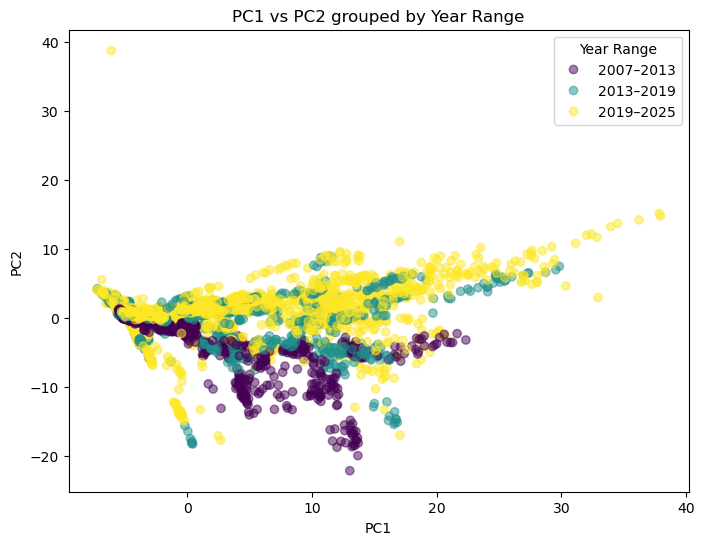

In [322]:
# plot PC1 vs PC2, colored by the year bins
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=df['Year_Group'].astype(int), cmap='viridis', alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PC1 vs PC2 grouped by Year Range')

# put legend for the groups
handles, labels = scatter.legend_elements(prop="colors")
year_ranges = ["2007–2013", "2013–2019", "2019–2025"]
plt.legend(handles, year_ranges, title="Year Range", loc='best')

plt.show()

There isn't a clear delineation for year groupings, but there are some subtleties. For instance, there is a noticeable shift over time, with observations from 2007–2013 clustering toward lower PC2 (more psych rehab/self-pay characteristics), while 2019–2025 data cluster at higher PC1 and PC2 (more revenue-driven, modernized, or Washington-based characteristics). This trend suggests that over time there have been some important changes for these hospitals.

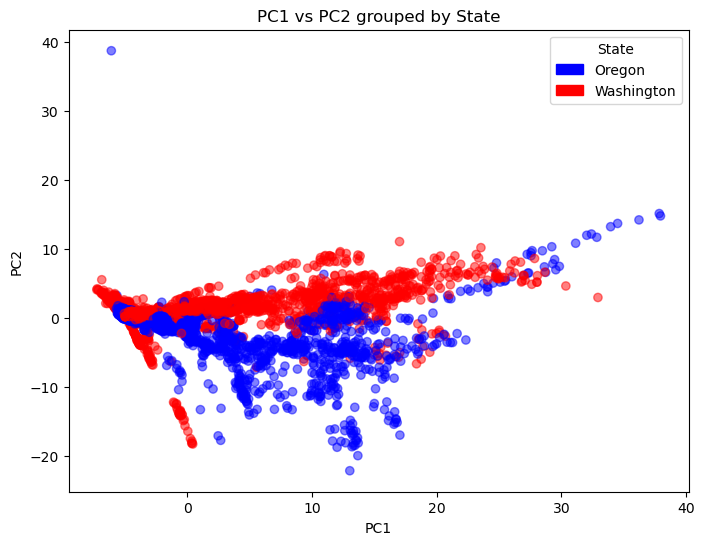

In [380]:
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1],
                      c=df_pca['State_Washington'],
                      cmap='bwr', alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PC1 vs PC2 grouped by State')

oregon_patch = mpatches.Patch(color='blue', label='Oregon')
washington_patch = mpatches.Patch(color='red', label='Washington')
plt.legend(handles=[oregon_patch, washington_patch], title='State')

plt.show()

There is clear separation, with Washington hospitals (red) tending to occupy regions of higher PC2 and PC1 values—suggesting higher revenue, more contractuals, and more recent operational characteristics. Oregon hospitals (blue) are more concentrated toward lower PC2, indicating differences in operational scale, financial structure, or service focus between the states. The overlap indicates some commonality, but this state-based grouping is a meaningful axis of variation in the data.

In [392]:
# compare hospital sizes between Washington and Oregon
df_wa = df[df['State'] == 'Washington']
df_or = df[df['State'] == 'Oregon']

df_wa['Licensed_Beds'].median(), df_or['Licensed_Beds'].median()

(70.0, 49.0)

### Conclusion

Principal Component Analysis revealed certain patterns in the hospital data, with the starkest separation observed between hospitals in Oregon and Washington. Washington hospitals are characterized by somewhat higher PC1 and much higher PC2 values, which correspond to greater revenue, more contractuals, and operational trends associated with more recent years. In contrast, Oregon hospitals cluster toward lower PC2 values, suggesting a difference in operational scale, financial structure, and/or general hospital activity. Indeed, Washington hospitals are generally much bigger in size than Oregon, supporting these observations.

The temporal trend is also quite clear: earlier years (2007–2013) are associated with lower PC2 and higher emphasis on psych rehab/self-pay features, while more recent years (2019–2025) shift toward higher PC1/PC2 (more revenue- and contractual-driven features). This aligns with evolving hospital operational models, payment structures, and maybe broader healthcare policy changes over time.